# Seleksi fitur dan total pendapatan modeling dari data automatic checkout, warehouse dan inventory system (Grocery Data - Automatic checkout, warehouse, or stock inventory system)

In [ ]:
#Install GeneticSelectionCV dari sklearn untuk feature seleksi menggunakan algorithma Genetic Algorithm
!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 15.2 MB/s 


In [1]:
#Import semua library yang diperlukan dalam proses di demo ini

import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import *
from google.colab import files, drive, data_table
from google.colab.data_table import *
import time

In [2]:
# menghubungkan google drive dengan googlecolabs untuk save dan import data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Membaca data

In [ ]:
# membaca data Cost.csv dan grocery_timestamps.csv dari google drive 

df1=pd.read_csv('/content/drive/MyDrive/DtsKominfo/Demo/Costs.csv', sep =';') # Simpan data dari Cost.csv ke df1
df_price = df1['price']
df2=pd.read_csv('/content/drive/MyDrive/DtsKominfo/Demo/grocery_timestamp.csv', sep = ';') # Simpan data dari grocery.csv ke df2
display(df1)

,product,demand,price,unit_cost,"order_cost,,"
0,air fresheners candles,39,"12,25","10,04",28
1,asian foods,245,"22,95","20,65",9
2,baby accessories,13,"28,92","22,27",21
3,baby bath body care,14,"24,99","20,99",5
4,baby food formula,505,"19,98","15,58",4
...,...,...,...,...,...
129,trash bags liners,66,"10,99","9,01",4
130,vitamins supplements,74,"17,89","15,21",10
131,water seltzer sparkling water,1418,"4,19","3,48",4
132,white wines,23,"13,99","10,91",13


# Exploratory Data

In [ ]:
# cek Isi variable df2 
display(df2)

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,930878.0,2.0,0.0,0:00:22,0:07:10,0:07:10,0:09:43,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1494544.0,2.0,0.0,0:02:45,0:07:41,0:07:41,0:10:25,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3275833.0,1.0,0.0,0:03:17,0:23:22,0:23:22,0:26:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,57650.0,2.0,0.0,0:03:33,0:16:29,0:16:29,0:22:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2002409.0,1.0,0.0,0:03:59,0:19:11,0:19:11,0:24:25,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,3193956.0,2.0,23.0,23:59:25,0:05:43,0:05:43,0:12:12,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# cek isi variable df1
df1.head()

,product,demand,price,unit_cost,"order_cost,,"
0,air fresheners candles,39,"12,25","10,04",28
1,asian foods,245,"22,95","20,65",9
2,baby accessories,13,"28,92","22,27",21
3,baby bath body care,14,"24,99","20,99",5
4,baby food formula,505,"19,98","15,58",4


In [ ]:
#Cek ukuran data dalam df2
df2.shape

(5004, 142)

In [ ]:
df2.describe

<bound method NDFrame.describe of        order_id  pay_method  order_hour_of_day arrival_ timestamp  \
0      930878.0         2.0                0.0            0:00:22   
1     1494544.0         2.0                0.0            0:02:45   
2     3275833.0         1.0                0.0            0:03:17   
3       57650.0         2.0                0.0            0:03:33   
4     2002409.0         1.0                0.0            0:03:59   
...         ...         ...                ...                ...   
4999  3193956.0         2.0               23.0           23:59:25   
5000        NaN         NaN                NaN                NaN   
5001        NaN         NaN                NaN                NaN   
5002        NaN         NaN                NaN                NaN   
5003        NaN         NaN                NaN                NaN   

     pickup_timestamp start_service_time finish_service_time  \
0             0:07:10            0:07:10             0:09:43   
1        

# Deteksi Missing Value
missing value : data-data yang tidak terdeteksi/tidak ada data(kosong)

In [ ]:
# Deteksi Adanya Missing Value data di df1, dimana ternyata tidak ada data yang bermasalah

print('Status Missing Values :',df1.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df1.isnull().sum().sort_values(ascending=False))

Status Missing Values : False

Jumlah Missing Values masing-masing kolom, adalah:
product         0
demand          0
price           0
unit_cost       0
order_cost,,    0
dtype: int64


In [ ]:
# Deteksi Adanya Missing Value data df2
# Ditemukan adanya data 'NAN' di 4 baris terakhir 

print('Status Missing Values :',df2.isna().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df2.isna().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
order_id         4
oils vinegars    4
milk             4
mint gum         4
missing          4
                ..
cream            4
crackers         4
cookies cakes    4
condiments       4
yogurt           4
Length: 142, dtype: int64


In [ ]:
# hapus data yang NAN dari df2 (ada 4 baris data NAN)
df2 = df2.dropna()
display(df2)

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,930878.0,2.0,0.0,0:00:22,0:07:10,0:07:10,0:09:43,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1494544.0,2.0,0.0,0:02:45,0:07:41,0:07:41,0:10:25,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3275833.0,1.0,0.0,0:03:17,0:23:22,0:23:22,0:26:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,57650.0,2.0,0.0,0:03:33,0:16:29,0:16:29,0:22:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2002409.0,1.0,0.0,0:03:59,0:19:11,0:19:11,0:24:25,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,765994.0,3.0,23.0,23:57:33,0:01:17,0:01:17,0:04:32,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4996,1015146.0,3.0,23.0,23:58:02,0:12:59,0:12:59,0:17:41,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,2660572.0,3.0,23.0,23:58:20,0:15:04,0:15:04,0:21:18,30.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4998,563443.0,3.0,23.0,23:58:25,0:19:13,0:19:13,0:25:27,26.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


#Ambil data price dan nama product

In [ ]:
# Ambil data yang diperlukan dari df1 yaitu price dan nama product
# Data nama produk dan price ini diperlukan untuk diolah untuk nantinya diproses di fitur seleksi dan modelling 
df = pd.DataFrame(df1, columns=['product','price'])
price = [float(df['price'][i].replace(',','.')) for i in range(len(df))] # Comand merubah koma menjadi titik di price
df['price'] = price
df

,product,price
0,air fresheners candles,12.25
1,asian foods,22.95
2,baby accessories,28.92
3,baby bath body care,24.99
4,baby food formula,19.98
...,...,...
129,trash bags liners,10.99
130,vitamins supplements,17.89
131,water seltzer sparkling water,4.19
132,white wines,13.99


In [ ]:
#Hitung total price untuk tiap order dari seluruh barang, yaitu total harga dari jumlah tiap barang yang dibeli x harga tiap jenis barang 

total_price = []
for i in range(len(df2)): # Range untuk seluruh order id 
   price = []
   for j in range(len(df)): # Range untuk seluruh jenis produk
       price.append(float(df2[df['product'][j]][i]) * float(df['price'][j])) # jumlah barang dibeli x harga barang untuk semua barang dan order id 
   total_price.append(round(sum(price),3))   # Jumlahkan dalam tiap order id
print(price)
print(len(total_price),total_price) # menampilkan jumlah data dan data total_price

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.38, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.57, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.89]
5000 [38.78, 16.92, 198.23, 74.19, 104.66, 46.87, 180.2, 143.34, 109.53, 69.58, 90.3, 203.23, 69.69, 89.34, 110.84, 30.42, 21.47, 69.98, 27.03, 24.85, 92.99, 79.51, 82.79, 41.45, 129.18, 64.72, 41.41, 38.57, 66.79, 55.77, 54.98, 73.44, 21.97, 22.48, 110.36, 32.42, 107.99, 47.54, 37.62, 191.34, 12.48, 110.12, 106.03, 17.9

In [ ]:
#Command Hitung time pickup (waktu pick - waktu datang) dan time service (waktu selesai service - mulai service)

import datetime 
import time
from datetime import datetime
from datetime import timedelta

time_pickup = []
for i in range(len(df2)):
    t1 = df2['arrival_ timestamp'][i]  # Ambil data waktu kedatangan
    t1 = datetime.strptime(t1, "%H:%M:%S") # Rubah ke bentuk datetime.time
    t2 = df2['pickup_timestamp'][i] # Ambil data waktu pick
    t2 = datetime.strptime(t2, "%H:%M:%S") # Rubah ke bentuk datetime.time
    if(t1<t2): t = t2-t1 # bila t2> t1
    elif(t1>t2):
        t = t2-t1
        t = t + timedelta(days = 1) # bila t1 > t2 tambahkan 24 jam (1 hari)
    else: t = 0
    
    time_pickup.append(str(t))
print(time_pickup)

time_service = []
for i in range(len(df2)):
    t1 = df2['start_service_time'][i]
    t1 = datetime.strptime(t1, "%H:%M:%S")
    t2 = df2['finish_service_time'][i]
    t2 = datetime.strptime(t2, "%H:%M:%S")
    if(t1<t2): t = t2-t1
    elif(t1>t2):
        t = t2-t1
        t = t + timedelta(days = 1)
    else: t = 0
    
    time_service.append(str(t))
print(time_service)

['0:06:48', '0:04:56', '0:20:05', '0:12:56', '0:15:12', '0:05:44', '0:24:24', '0:21:23', '0:12:28', '0:08:21', '0:15:23', '0:25:06', '0:09:36', '0:11:26', '0:08:02', '0:07:08', '0:04:16', '0:09:55', '0:04:49', '0:04:59', '0:12:20', '0:10:00', '0:13:19', '0:07:11', '0:17:03', '0:10:28', '0:06:39', '0:07:06', '0:04:59', '0:07:55', '0:08:42', '0:11:39', '0:03:45', '0:03:35', '0:10:56', '0:05:53', '0:14:24', '0:03:43', '0:07:21', '0:20:44', '0:03:49', '0:13:23', '0:16:07', '0:03:52', '0:11:44', '0:15:35', '0:07:22', '0:08:30', '0:09:02', '0:04:52', '0:04:12', '0:06:29', '0:17:12', '0:10:46', '0:05:52', '0:04:39', '0:04:45', '0:44:55', '0:07:38', '0:00:43', '0:10:24', '0:10:57', '0:06:19', '0:14:13', '0:05:48', '0:04:30', '0:09:41', '0:05:31', '0:04:09', '0:02:44', '0:14:51', '0:19:02', '0:07:08', '0:05:58', '0:19:05', '0:04:07', '0:03:26', '0:18:02', '0:11:05', '0:21:58', '0:23:12', '0:13:39', '0:06:45', '0:02:35', '0:08:01', '0:16:23', '0:16:09', '0:07:43', '0:04:07', '0:11:21', '0:23:46'

In [ ]:
# Buat Kolom di dataframe untuk lama waktu pickup, lama service dan total harga
df2['time_pickup'] = time_pickup
df2['time_service'] = time_service
df2['Total_Price'] = total_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Simpan data hasil bentukan ke file agar bisa di import ulang lain waktu
df2.to_csv('/content/drive/MyDrive/DtsKominfo/Demo/Data_Demo_Auto_6_v1.csv', index=False, header=True)

# Feature Selection Untuk memilih produk dominan terhadap Total_price

In [3]:
# membaca Ulang data Data_Demo_Auto_6.xlsx yang telah digabungkan dalam file excell
excel = '/content/drive/MyDrive/DtsKominfo/Demo/Data_Demo_Auto_6.xlsx'
df1 = pd.read_excel(excel, 'Costs')
df2 = pd.read_excel(excel, 'Data_Demo_Auto_6')

# membaca Ulang data Data_Demo_Auto_6.xlsx yang telah digabungkan dalam file csv
#df2=pd.read_csv('/content/drive/MyDrive/DtsKominfo/Demo/Data_Demo_Auto_6.csv') 
display(df2)

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,time_pickup,time_service,Total_Price
0,930878,2,0,00:00:22,00:07:10,00:07:10,00:09:43,17,0,0,...,0,0,0,0,0,0,0,00:06:48,00:02:33,38.78
1,1494544,2,0,00:02:45,00:07:41,00:07:41,00:10:25,11,0,0,...,0,0,0,0,0,0,0,00:04:56,00:02:44,16.92
2,3275833,1,0,00:03:17,00:23:22,00:23:22,00:26:11,3,0,0,...,0,0,0,0,0,0,1,00:20:05,00:02:49,198.23
3,57650,2,0,00:03:33,00:16:29,00:16:29,00:22:11,3,0,0,...,0,0,0,0,1,0,0,00:12:56,00:05:42,74.19
4,2002409,1,0,00:03:59,00:19:11,00:19:11,00:24:25,10,0,0,...,0,0,0,0,0,0,1,00:15:12,00:05:14,104.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,765994,3,23,23:57:33,00:01:17,00:01:17,00:04:32,13,0,0,...,0,0,1,0,0,0,0,00:03:44,00:03:15,16.97
4996,1015146,3,23,23:58:02,00:12:59,00:12:59,00:17:41,19,0,0,...,0,0,0,0,0,0,0,00:14:57,00:04:42,128.54
4997,2660572,3,23,23:58:20,00:15:04,00:15:04,00:21:18,30,0,0,...,0,1,0,0,0,0,1,00:16:44,00:06:14,113.75
4998,563443,3,23,23:58:25,00:19:13,00:19:13,00:25:27,26,0,0,...,0,0,0,0,0,0,3,00:20:48,00:06:14,145.67


In [ ]:
# Ambil data untuk pembentukan input 
df = pd.DataFrame(df1, columns=['product','price'])
price = [float(df['price'][i].replace(',','.')) for i in range(len(df))]
df['price'] = price
df

,product,price
0,air fresheners candles,12.25
1,asian foods,22.95
2,baby accessories,28.92
3,baby bath body care,24.99
4,baby food formula,19.98
...,...,...
129,trash bags liners,10.99
130,vitamins supplements,17.89
131,water seltzer sparkling water,4.19
132,white wines,13.99


# Menentukan data inputan dan Output

In [ ]:
# Menentukan data inputan untuk fitur seleksi (seluruh jenis barang 134 barang tiap order)
X = df2.drop(columns=['order_id', 'pay_method', 'order_hour_of_day', 'arrival_ timestamp', 'pickup_timestamp', 'start_service_time', 'finish_service_time', 'days_since_prior_order','time_pickup', 'time_service', 'Total_Price'])
X

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4996,0,0,0,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4998,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,3


In [ ]:
# Rubah tipe data dalam Input X ke float dari Int64 agar sebanding dengan total_price
for j in range(len(df)):
    X[df['product'][j]] = X[df['product'][j]].astype(float) #Rubah tipe cell dari Int64 ke float

In [ ]:
#buat data input, jumlah barang x price

for j in range(len(df)):
    for i in range(len(X)):      
        X[df['product'][j]][i] = float(X[df['product'][j]][i] * df['price'][j]) #kalikan pembelian * harga
display(X)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,15.99,43.96,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.89
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,4.19,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,10.99,0.0,0.00,0.0,0.00
4996,0.0,0.0,0.0,0.0,0.0,0.00,32.97,10.8,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
4997,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,4.19,0.00,0.00,0.0,5.99,0.00,0.0,0.00,0.0,3.89
4998,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,4.19,3.49,2.69,0.0,0.00,0.00,0.0,0.00,0.0,11.67


In [ ]:
# Simpan hasil bentukan Data input ke file 
X.to_csv('/content/drive/MyDrive/DtsKominfo/Demo/X_auto_6.csv', index=False, header=True)

In [ ]:
# membaca Ulang data Data_Demo_Auto_6.xlsx yang telah digabungkan dalam file csv
X=pd.read_csv('/content/drive/MyDrive/DtsKominfo/Demo/X_auto_6.csv') 
display(X)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,15.99,43.96,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.89
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,4.19,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,10.99,0.0,0.00,0.0,0.00
4996,0.0,0.0,0.0,0.0,0.0,0.00,32.97,10.8,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
4997,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,4.19,0.00,0.00,0.0,5.99,0.00,0.0,0.00,0.0,3.89
4998,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,4.19,3.49,2.69,0.0,0.00,0.00,0.0,0.00,0.0,11.67


In [ ]:
# Menentukan data output atau target
Y = pd.DataFrame(df2['Total_Price'])
Y

,Total_Price
0,38.78
1,16.92
2,198.23
3,74.19
4,104.66
...,...
4995,16.97
4996,128.54
4997,113.75
4998,145.67


# Proses Feature Selection 

In [ ]:
# Fitur seleksi dengan genetic Algorithm estimator Decission Tree
# Scoring neg_mean_squared_error (-1*MSE)
# Max feature 30 jadi diambil maksimal 30 fitur yang berperan dominan dari 134 jenis barang

t1=time.time()
print(t1)

report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 

estimators = DecisionTreeRegressor()
print("Estimator dipakai : ", estimators )
selector = GeneticSelectionCV(estimators,
                                cv = 5,
                                verbose = 1,
                                scoring="neg_mean_squared_error", 
                                max_features = 30,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 30,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.1,
                                tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
selector = selector.fit(X, Y)
genfeats = X.columns[selector.support_]
genfeats = list(genfeats)
print("Chosen Feats: {} of {}, scores : {} " .format(genfeats, selector.n_features_, round(selector.generation_scores_[-1], 3)))

cv_score = selector.generation_scores_[-1]
nofeats.append(len(genfeats)) 
chosen_feats.append(genfeats) 
cvscore.append(cv_score)

report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

t2=time.time()
t_polyfit = float(t2-t1) #Hitung Lama waktu Proses 
print("Lama waktu Proses fitur seleksi : {} seconds".format(t_polyfit)) 

1657714272.075168
Estimator dipakai :  DecisionTreeRegressor()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selecting features with genetic algorithm.
gen	nevals	avg                                     	std                                  	min                                     	max                                     
0  	200   	[-2710.966737    16.105      256.104274]	[ 316.902179    8.435874   71.023169]	[-3296.839026     1.          82.708839]	[-1886.012211    30.         563.873476]
1  	117   	[-2989.244159    20.565      974.381207]	[ 2012.748121     7.54823   2571.191753]	[-10000.            4.           76.679327]	[-1855.609825    42.       10000.      ]
2  	100   	[-2982.743418    21.61      1161.235882]	[ 2283.575886     7.530465  2864.688943]	[-10000.            4.           60.762683]	[-1778.426196    39.       10000.      ]
3  	124   	[-3284.559179    24.04      1681.441409]	[ 2828.559075     7.174845  3495.144763]	[-10000.            8.           42.397986]	[-1670.974776    40.       10000.      ]
4  	112   	[-2978.237944    24.81      1422.670166]	[ 2659.913791     6.041846 

In [ ]:
#Print Reports hasil fitur seleksi GA
report["Scores"] = np.round(report["Scores"], 3)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
DataTable(report)
print("Feature selection recommend:", ga_feats)
print("Estimator : {}, reports : ". format(selector.estimator_))
report

Feature selection recommend: ['asian foods', 'baby food formula', 'baking supplies decor', 'beauty', 'beers coolers', 'canned jarred vegetables', 'canned meals beans', 'cereal', 'chips pretzels', 'cleaning products', 'deodorants', 'energy sports drinks', 'eye ear care', 'facial care', 'food storage', 'fresh fruits', 'fresh vegetables', 'laundry', 'oils vinegars', 'packaged cheese', 'packaged vegetables fruits', 'soap']
Estimator : DecisionTreeRegressor(), reports : 


,No of Feats,Chosen Feats,Scores
0,22,"[asian foods, baby food formula, baking suppli...",-1246.831


In [ ]:
# Berikut Hasil Fitur terseleksi (maks 30) yang pengaruhnya besar terhadap penjualan dalam bentuk kolom
np.transpose(ga_feats).tolist()

['asian foods',
 'baby food formula',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'canned jarred vegetables',
 'canned meals beans',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'deodorants',
 'energy sports drinks',
 'eye ear care',
 'facial care',
 'food storage',
 'fresh fruits',
 'fresh vegetables',
 'laundry',
 'oils vinegars',
 'packaged cheese',
 'packaged vegetables fruits',
 'soap']

# Visualisasi Data

In [ ]:
#dari produk df2, menghitung total jumlah barang dibeli per order id
df2_produk=df2.iloc[:,8:-3]
jumlah=[]
for kolom in df2_produk.columns:
  jumlah=df2_produk.sum(axis=1) # Hitung sum dari barang dibeli per order id
jumlah.append(jumlah)
print(jumlah)

0        7
1        4
2       24
3       16
4       18
        ..
4995     2
4996    18
4997    18
4998    25
4999     6
Length: 5000, dtype: int64


In [ ]:
#Masukkan data jumlah total barang ke df2
df2['total_barang']=jumlah
df2

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,time_pickup,time_service,Total_Price,total_barang
0,930878,2,0,00:00:22,00:07:10,00:07:10,00:09:43,17,0,0,...,0,0,0,0,0,0,00:06:48,00:02:33,38.78,7
1,1494544,2,0,00:02:45,00:07:41,00:07:41,00:10:25,11,0,0,...,0,0,0,0,0,0,00:04:56,00:02:44,16.92,4
2,3275833,1,0,00:03:17,00:23:22,00:23:22,00:26:11,3,0,0,...,0,0,0,0,0,1,00:20:05,00:02:49,198.23,24
3,57650,2,0,00:03:33,00:16:29,00:16:29,00:22:11,3,0,0,...,0,0,0,1,0,0,00:12:56,00:05:42,74.19,16
4,2002409,1,0,00:03:59,00:19:11,00:19:11,00:24:25,10,0,0,...,0,0,0,0,0,1,00:15:12,00:05:14,104.66,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,765994,3,23,23:57:33,00:01:17,00:01:17,00:04:32,13,0,0,...,0,1,0,0,0,0,00:03:44,00:03:15,16.97,2
4996,1015146,3,23,23:58:02,00:12:59,00:12:59,00:17:41,19,0,0,...,0,0,0,0,0,0,00:14:57,00:04:42,128.54,18
4997,2660572,3,23,23:58:20,00:15:04,00:15:04,00:21:18,30,0,0,...,1,0,0,0,0,1,00:16:44,00:06:14,113.75,18
4998,563443,3,23,23:58:25,00:19:13,00:19:13,00:25:27,26,0,0,...,0,0,0,0,0,3,00:20:48,00:06:14,145.67,25


In [ ]:
#Menghitung produk terjual dalam 1 hari untuk tiap nama produk 
#Dari produk df2, menghitung produk terjual dari masing-masing kolom produk(atau pada df1 disebut kolom demands)
df2_produk=df2.iloc[:,8:-3]
jumlah_terjual=[]
for kolom in df2_produk.columns:
  jumlah=df2_produk.sum(axis=0) # Menghitung jumlah total pembelian untuk masing2 jenis barang
jumlah_terjual.append(jumlah)
print(jumlah_terjual)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


[air fresheners candles             39
asian foods                       245
baby accessories                   13
baby bath body care                14
baby food formula                 505
                                 ... 
trash bags liners                  66
vitamins supplements               74
water seltzer sparkling water    1418
white wines                        23
yogurt                           2172
Length: 134, dtype: int64]


In [ ]:
#dari df1(cost), menghitung total harga dari masing-masing produk yang terjual

df1['total_harga_produk_terjual']=df1['demands']*df1['price'] #Menghitung penghasilan penjualan untuk masing2 jenis barang
df1['total_harga_produk_terjual']

0        477.75
1       5622.75
2        375.96
3        349.86
4      10089.90
         ...   
129      725.34
130     1323.86
131     5941.42
132      321.77
133     8449.08
Name: total_harga_produk_terjual, Length: 134, dtype: float64

In [ ]:
df1.head()

,product,demands,price,unit_cost,order_cost,Jumlah produk terjual,total_harga_produk_terjual
0,air fresheners candles,39,12.25,10.04,28,39,477.75
1,asian foods,245,22.95,20.65,9,245,5622.75
2,baby accessories,13,28.92,22.27,21,13,375.96
3,baby bath body care,14,24.99,20.99,5,14,349.86
4,baby food formula,505,19.98,15.58,4,505,10089.90


Text(0.5, 1.0, 'Jumlah Pembelian Semua Barang ')

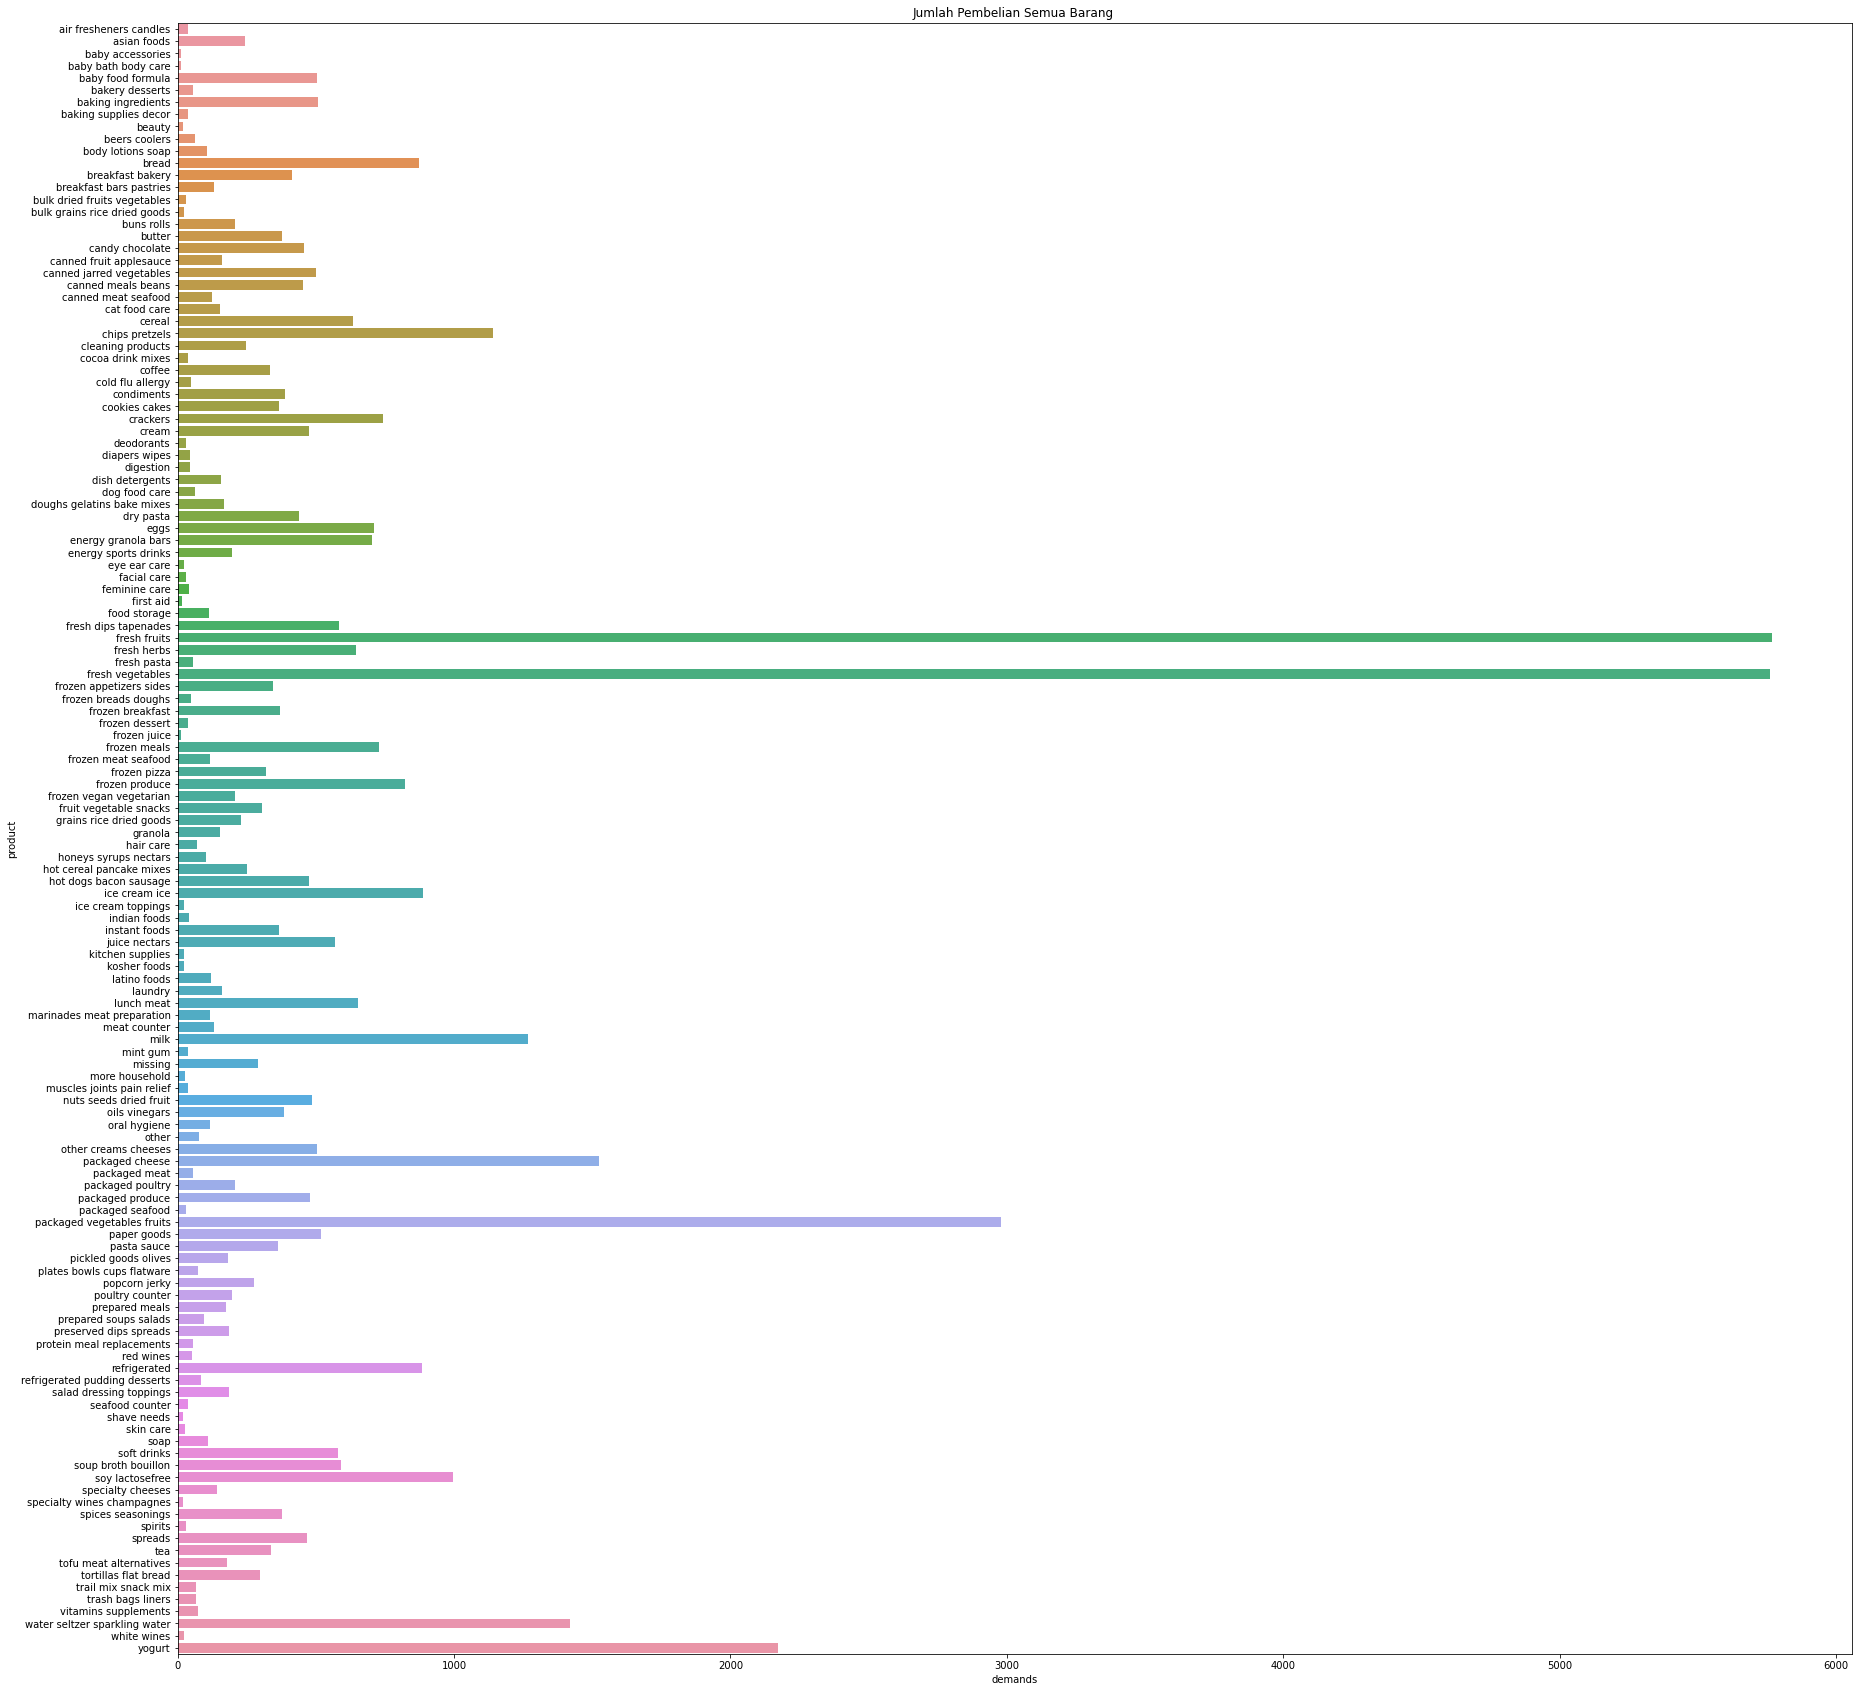

In [ ]:
#menampilkan grafik jumlah produk terjual tiap jenis barang
#menunjukkan 3 barang mayoritas dibeli adalah : Fresh fruit, Fresh vegetable dan packaging vegetable fruit
plt.figure(figsize=(30, 30))
sns.barplot(y ='product', x = 'demands', data=df1).set_title("Jumlah Pembelian Semua Barang ")

Text(0.5, 1.0, 'Jumlah total harga Pembelian masing-masing Barang ')

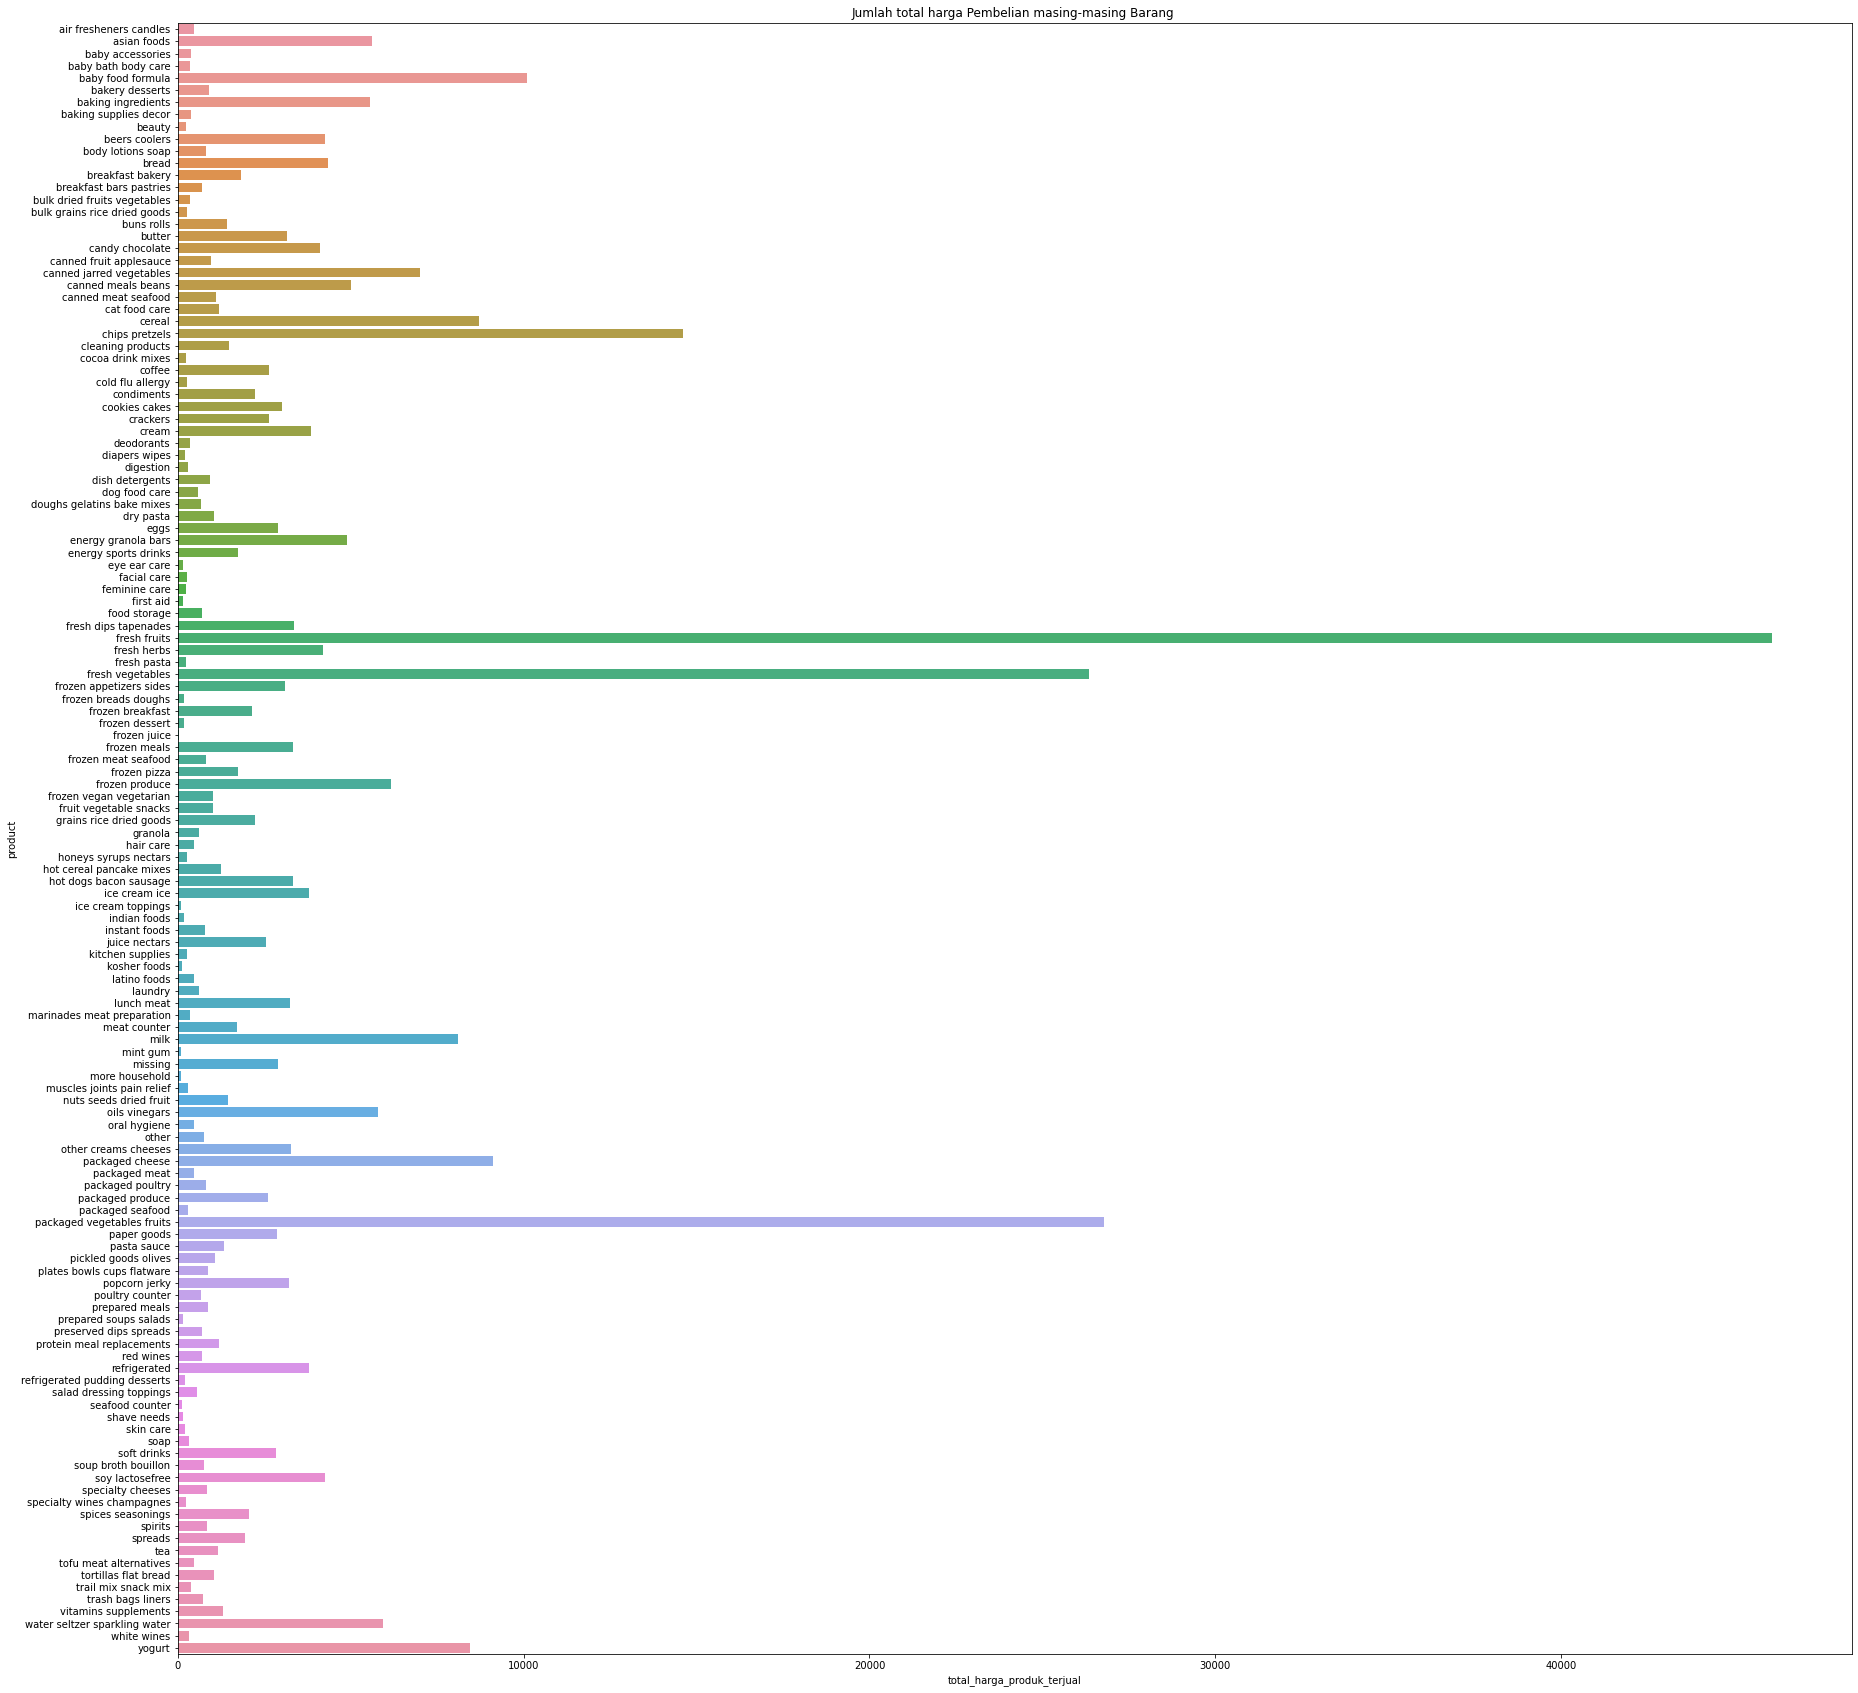

In [ ]:
#menampilkan grafik barplot jumlah Harga produk terjual tiap jenis barang
plt.figure(figsize=(30, 30))
sns.barplot(y ='product', x = 'total_harga_produk_terjual', data=df1).set_title("Jumlah total harga Pembelian masing-masing Barang ")

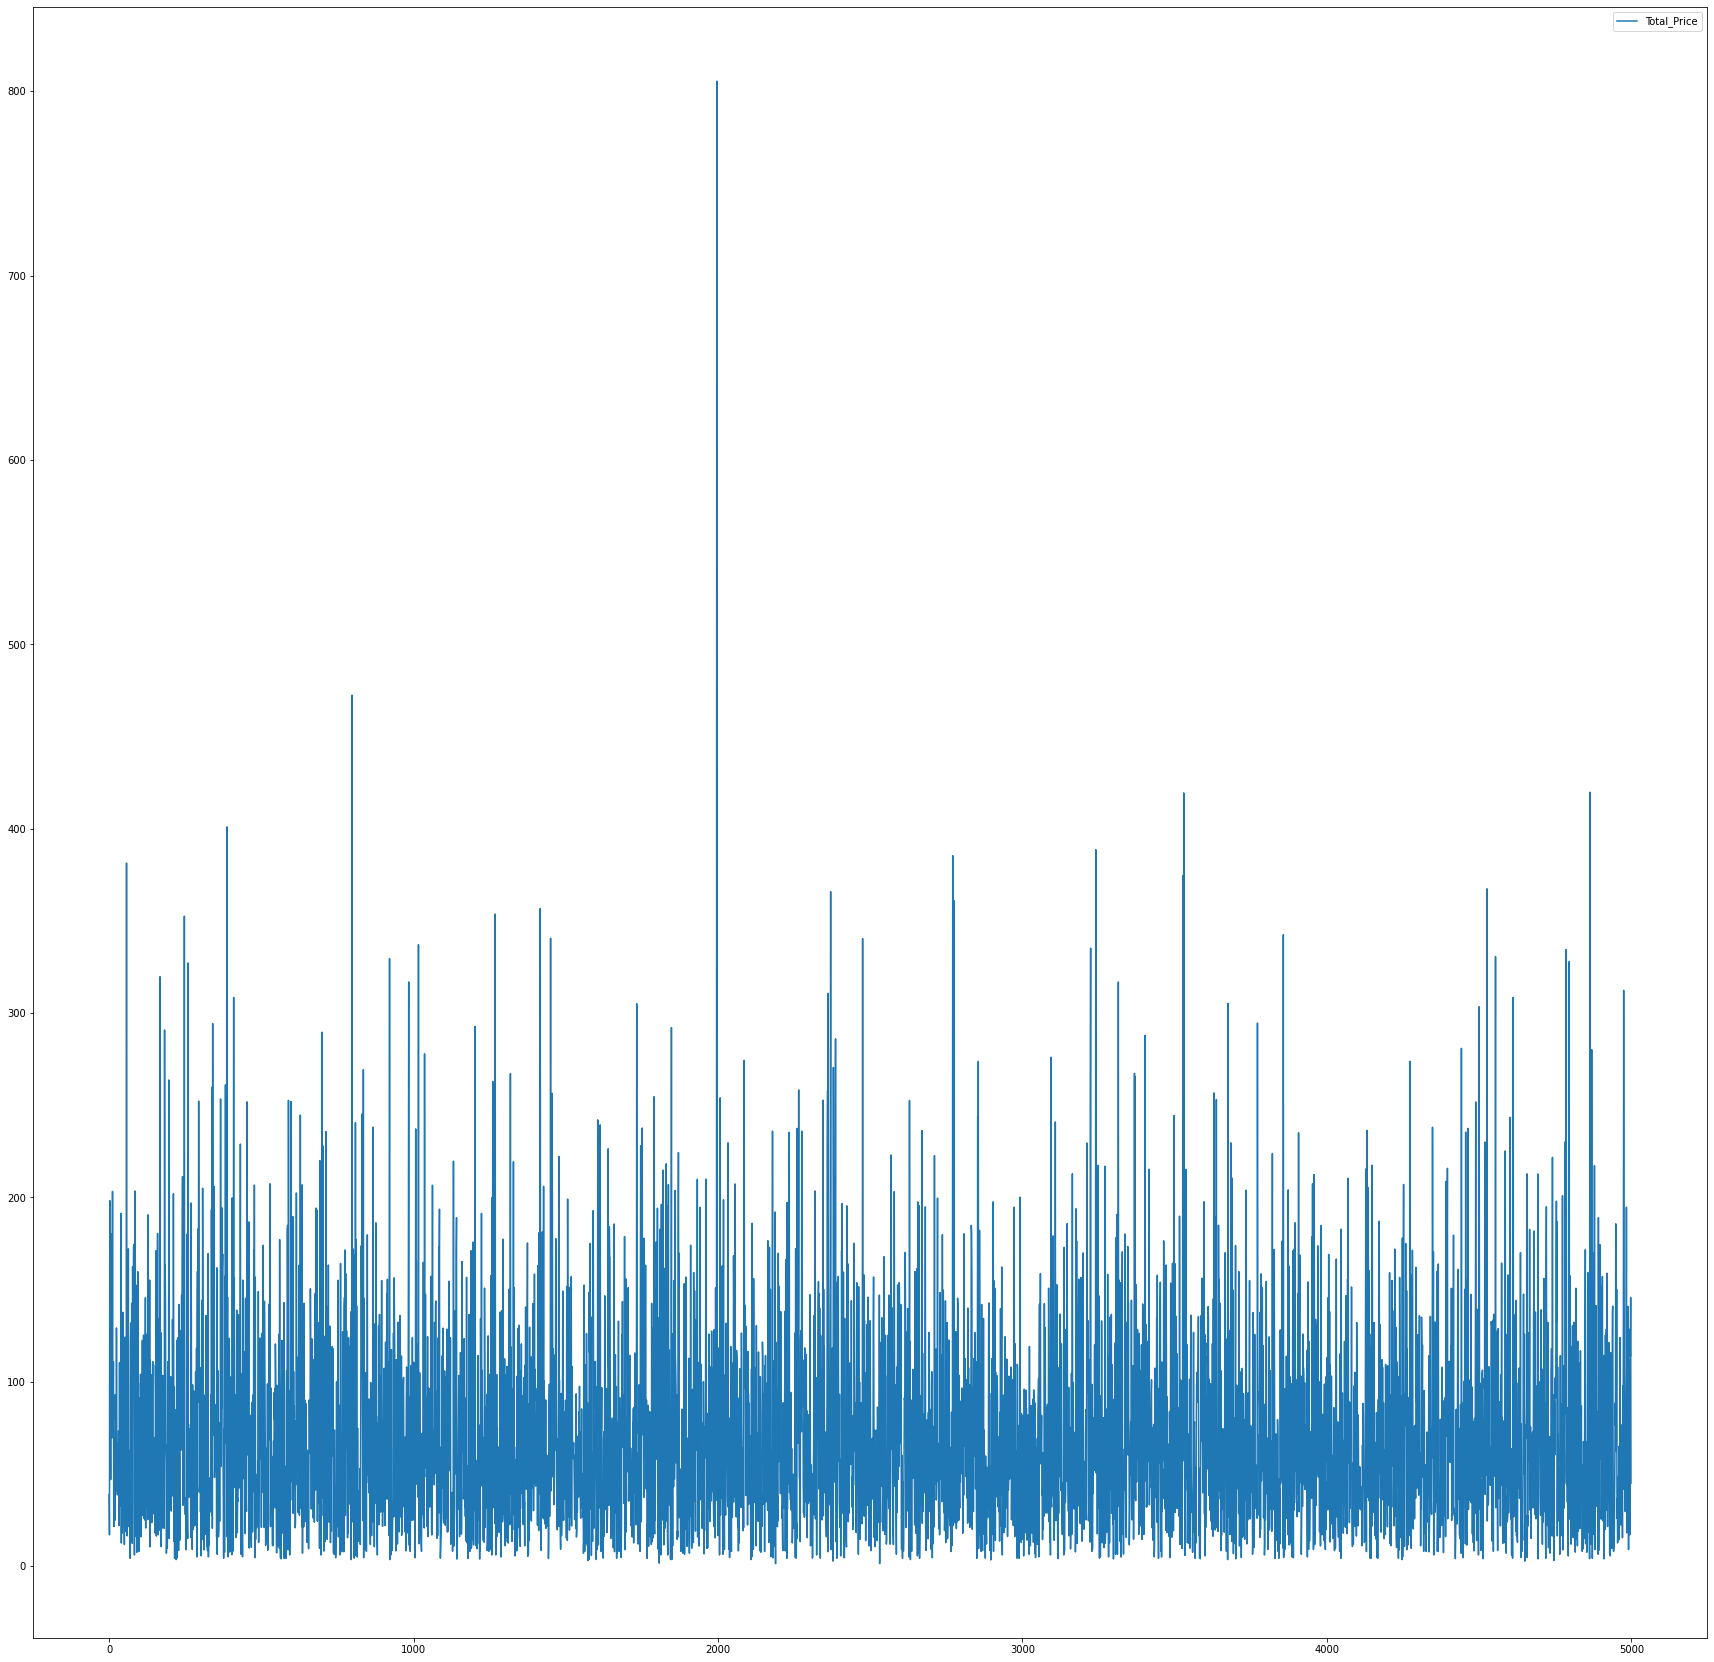

In [ ]:
#menampilkan grafik barplot grafik jumlah Harga produk terjual untuk tiap order id (total_price vs waktu)
plt.figure(figsize=(30, 30))
data = pd.DataFrame(df2, columns=['arrival_ timestamp', 'Total_Price'])
sns.lineplot(data = data)
#data

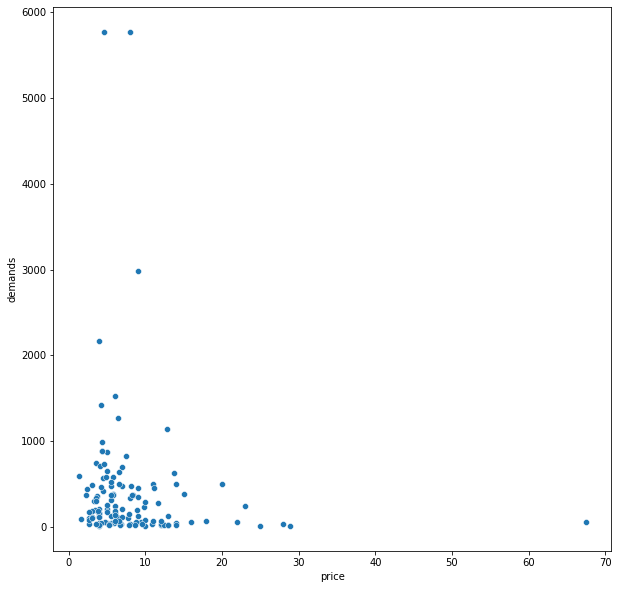

In [ ]:
#menampilkan grafik hubungan antar harga barang dan jumlah pembelian semua barang/demands
#Menunjukkan bahwa mayoritas suka beli barang yang harganya rendah, dan sedikit yang beli barang harga mahal
data = pd.DataFrame(df2, columns=['price', 'demands'])
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df1, x="price", y='demands')

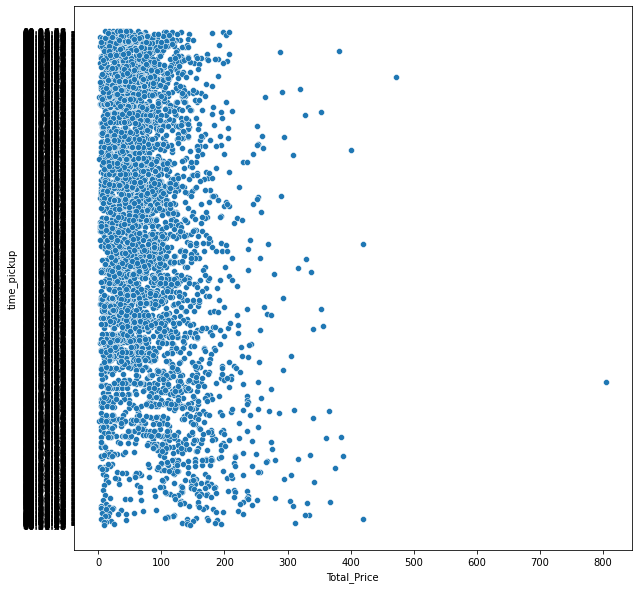

In [ ]:
#mengubah bentuk datetime ke bentuk string
df2['time_pickup']=df2['time_pickup'].astype('str')
df2['time_service']=df2['time_service'].astype('str')

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df2, x="Total_Price", y='time_pickup') #menampilkan grafik hubungan antar Total harga dan Lama waktu pick

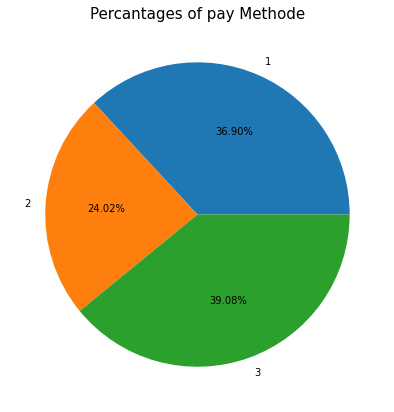

In [ ]:
#Piechart yang menunjukkan percentage of pay methode from total price dalam bentuk pie chart
df2.groupby('pay_method')['Total_Price'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of pay Methode', fontsize = 15)
plt.show()

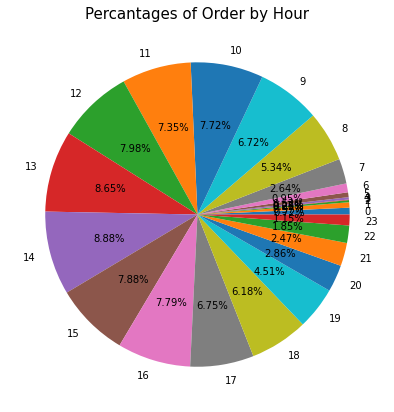

In [ ]:
#Pie chart dari total price untuk tiap jam nya (24 jam)
df2.groupby('order_hour_of_day')['Total_Price'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Order by Hour', fontsize = 15)
plt.show()

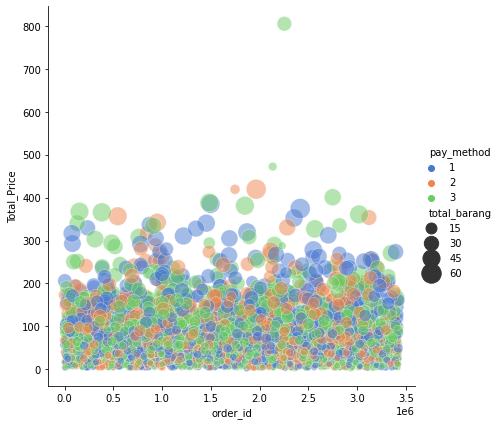

In [ ]:
#Display scatter plot untuk total price dari tiap order id, dengan variasi jenis pembayaran dan jumlah total barang tiap order 
data = pd.DataFrame(df2, columns=['demand', 'price', 'Jumlah produk terjual'])
sns.relplot(x="order_id", y="Total_Price", hue="pay_method", size="total_barang",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df2)

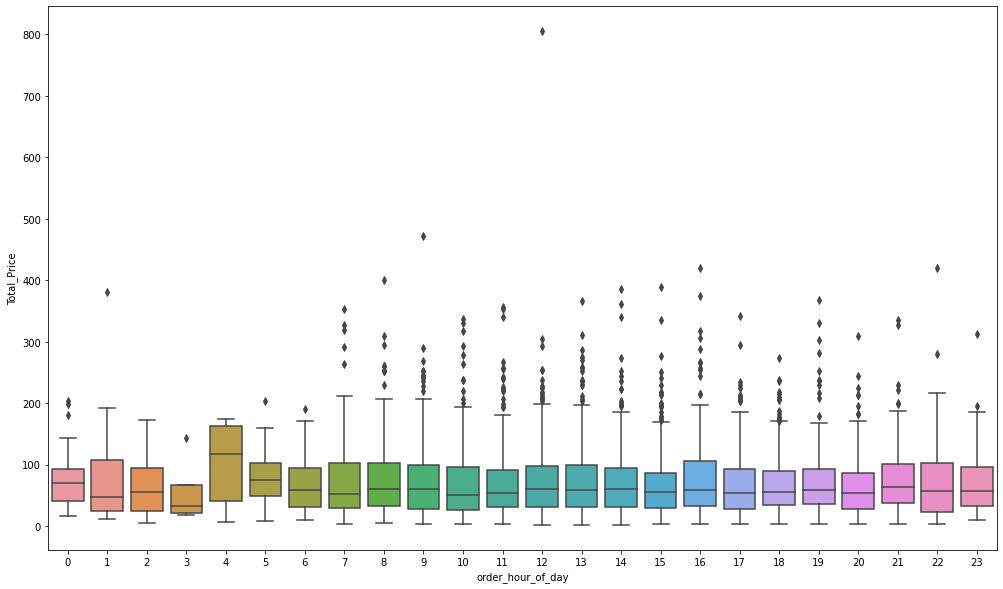

In [ ]:
#Tampilan BoxPlot sebaran statistik total harga di pembelian tiap jamnya
sns.boxplot(x=df2['order_hour_of_day'], y=df2['Total_Price'])

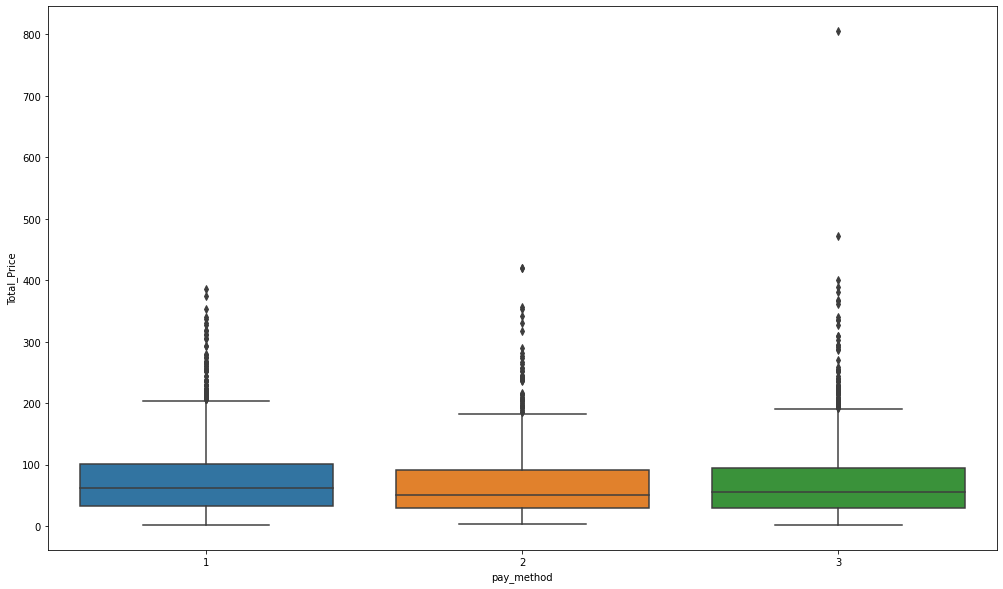

In [ ]:
#Tampilan BoxPlot yang menunjukkan sebaran total harga untuk tiap metode pembayaran 
sns.boxplot(x=df2['pay_method'], y=df2['Total_Price'])

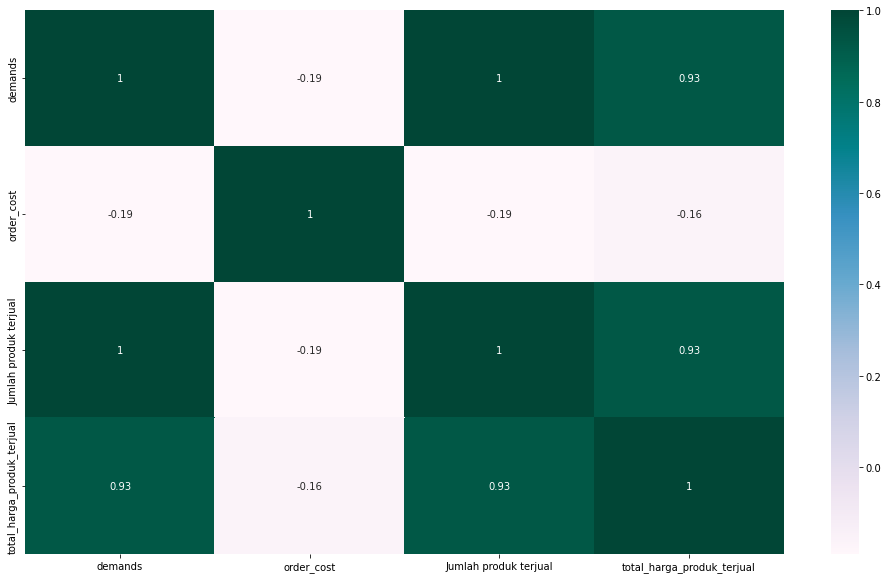

In [ ]:
# Buat korelasi heatmap untuk data dari df1 kecuali nama produk 
df3 = df1.drop(columns=['product'])
sns.heatmap(np.round(df3.corr(),2), cmap='PuBuGn', annot=True)

# Pembuatan Model prediksi Total_price berikutnya berdasar data Total_price sebelumnya 

In [ ]:
df2.head()

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,time_pickup,time_service,Total_Price
0,930878,2,0,00:00:22,00:07:10,00:07:10,00:09:43,17,0,0,...,0,0,0,0,0,0,0,00:06:48,00:02:33,38.78
1,1494544,2,0,00:02:45,00:07:41,00:07:41,00:10:25,11,0,0,...,0,0,0,0,0,0,0,00:04:56,00:02:44,16.92
2,3275833,1,0,00:03:17,00:23:22,00:23:22,00:26:11,3,0,0,...,0,0,0,0,0,0,1,00:20:05,00:02:49,198.23
3,57650,2,0,00:03:33,00:16:29,00:16:29,00:22:11,3,0,0,...,0,0,0,0,1,0,0,00:12:56,00:05:42,74.19
4,2002409,1,0,00:03:59,00:19:11,00:19:11,00:24:25,10,0,0,...,0,0,0,0,0,0,1,00:15:12,00:05:14,104.66


In [ ]:
len(df2)

5000

In [ ]:
# Ambil data hanya Total price untuk membuat model univariate total price berikutnya dari data sebelumnya
train = df2['Total_Price']
train

0        38.78
1        16.92
2       198.23
3        74.19
4       104.66
         ...  
4995     16.97
4996    128.54
4997    113.75
4998    145.67
4999     44.94
Name: Total_Price, Length: 5000, dtype: float64

In [ ]:
type(train[0])

numpy.float64

In [ ]:
# Feature Scaling (Normalization Minmax) --> Normalisasi data training
mn, mx = min(train), max(train)
train_scaled = [(x - mn) / (mx - mn) for x in train] #scaling data total_price ke 0 s/d 1
train_scaled[:10]

[0.046617177105482396,
 0.01943522214346999,
 0.24488628592034417,
 0.09064796508374677,
 0.12853607888486837,
 0.05667673866278708,
 0.22246676863008416,
 0.17663296900063416,
 0.13459171112022977,
 0.08491563148928762]

In [ ]:
# membuat data structure dengan 9 timesteps sebagai input (X) dan 1 output (Y)
dfx = []
dfy = []
timestep = 9
for i in range(10, len(train_scaled)):
    dfx.append(train_scaled[(i-10):(i-1)]) # 9 data sbeelumnya sebagai input
    dfy.append(train_scaled[i]) # data ke i sebagai output
dfx, dfy = np.array(dfx), np.array(dfy)
dfx

array([[0.04661718, 0.01943522, 0.24488629, ..., 0.22246677, 0.17663297,
        0.13459171],
       [0.01943522, 0.24488629, 0.09064797, ..., 0.17663297, 0.13459171,
        0.08491563],
       [0.24488629, 0.09064797, 0.12853608, ..., 0.13459171, 0.08491563,
        0.11068005],
       ...,
       [0.02944505, 0.06456025, 0.1176434 , ..., 0.10132925, 0.13735218,
        0.01949739],
       [0.06456025, 0.1176434 , 0.17351189, ..., 0.13735218, 0.01949739,
        0.15822982],
       [0.1176434 , 0.17351189, 0.00956218, ..., 0.01949739, 0.15822982,
        0.1398391 ]])

In [ ]:
dfx[0]

array([0.04661718, 0.01943522, 0.24488629, 0.09064797, 0.12853608,
       0.05667674, 0.22246677, 0.17663297, 0.13459171])

In [16]:
#Gambarkan grafik data X_Training terhadap y_training
def gambar(datax,datay, title, sbx, sby):
  plt.rcParams["figure.figsize"] = (17,10)
  plt.plot(datax,datay)
  plt.xlabel(sbx)
  plt.ylabel(sby)
  plt.title(title) 
  plt.show()


In [ ]:
gambar(dfx,dfy, "Data Training", 'X_Training', 'y_Training')

In [9]:
#Building the RNN model univariate
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (timestep,1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

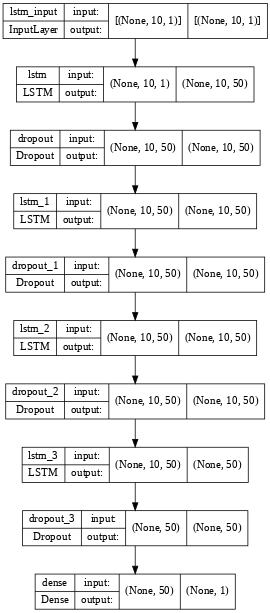

In [10]:
#visualise Model 
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [11]:
# Compiling the RNN model dengan output parameter loss 'MSE'
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# jalankan Fitting the RNN to the Training set 100 epoch
history = model.fit(dfx, dfy, epochs = 100, batch_size=32);

Epoch 1/100
156/156 [==============================] - 10s 18ms/step - loss: 0.0054
Epoch 2/100
156/156 [==============================] - 3s 21ms/step - loss: 0.0052
Epoch 3/100
156/156 [==============================] - 3s 21ms/step - loss: 0.0052
Epoch 4/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0052
Epoch 5/100
156/156 [==============================] - 3s 20ms/step - loss: 0.0051
Epoch 6/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0052
Epoch 7/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0052
Epoch 8/100
156/156 [==============================] - 5s 35ms/step - loss: 0.0052
Epoch 9/100
156/156 [==============================] - 4s 24ms/step - loss: 0.0051
Epoch 10/100
156/156 [==============================] - 4s 27ms/step - loss: 0.0052
Epoch 11/100
156/156 [==============================] - 3s 22ms/step - loss: 0.0051
Epoch 12/100
156/156 [==============================] - 3s 20ms/step - loss: 0.0051


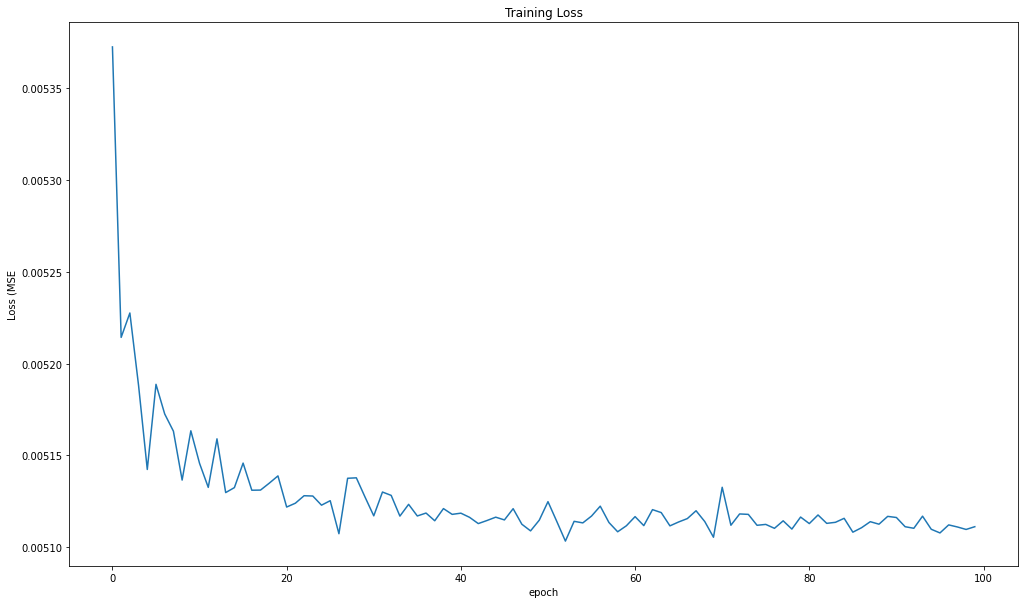

In [ ]:
#Tampilkan data loss dalam proses training
len(history.history['loss'])
gambar(history.epoch,history.history['loss'], 'Training Loss', 'epoch', 'Loss (MSE')

In [ ]:
#save model ke file h5
model.save('/content/drive/MyDrive/DtsKominfo/Demo/model_demo.h5')

In [ ]:
#membuat prediksi output model dari data training (input dfx)
prediksi = model.predict(dfx)

In [ ]:
#Hitung score hasil prediksi model (Evaluasi) 
#Diperoleh hasil score evaluasi 0.5% error
scores = model.evaluate(dfx, dfy, verbose=1)
print("Hasil tes evaluasi model : {} %" .format(scores * 100))

156/156 [==============================] - 2s 6ms/step - loss: 0.0051
Hasil tes evaluasi model : 0.5110546946525574 %


In [ ]:
#Hitung score error hasil prediksi MAE, MSE, RMSE
from sklearn import metrics

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(dfy, prediksi),3)) #MAE
print('Mean Squared Error:', np.round(metrics.mean_squared_error(dfy, prediksi),3)) #MSE
print('Root Mean Squared Error:', np.round(metrics.mean_squared_error(dfy, prediksi, squared=False),3)) #RMSE

Mean Absolute Error: 0.052
Mean Squared Error: 0.005
Root Mean Squared Error: 0.071


Text(0, 0.5, 'Actual Total price')

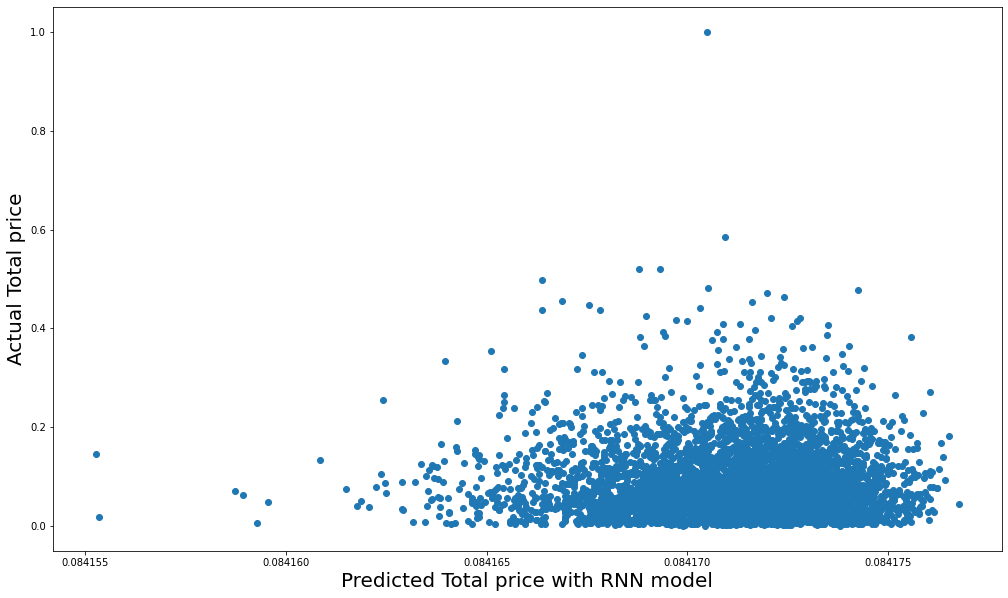

In [ ]:
#menampilkan grafik hubungan antar actual Total_Price dan Prediksi total_price
plt.scatter(prediksi, dfy)
plt.xlabel("Predicted Total price with RNN model",fontsize=20)
plt.ylabel("Actual Total price",fontsize=20)

# Modelling Time series waktu pick Up vs Total_Price (jam 00 -23.59)

In [5]:
# Ambil data dari df2 hanya jam kedatangan dan Total price untuk memodelkan total_price vs waktu 
training_set = df2.filter(['arrival_ timestamp', 'Total_Price'], axis=1)
training_set=pd.DataFrame(training_set)
training_set.head()

,arrival_ timestamp,Total_Price
0,00:00:22,38.78
1,00:02:45,16.92
2,00:03:17,198.23
3,00:03:33,74.19
4,00:03:59,104.66


In [6]:
#Rubah waktu kedatangan kedalam second dihitung dari jam 00:00

import pytz

dt_utc = []
local = pytz.timezone("America/Los_Angeles") # Anggap local time america
for dt in training_set['arrival_ timestamp']:
  seconds = (dt.hour * 60 + dt.minute) * 60 + dt.second # Command untuk merubah waktu ke second
  dt_utc.append(seconds)
training_set['arrival_ timestamp'] = dt_utc
training_set.head()

,arrival_ timestamp,Total_Price
0,22,38.78
1,165,16.92
2,197,198.23
3,213,74.19
4,239,104.66


In [7]:
# Feature Scaling (Normalization Minmax)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) #MinMax scaler ke range 0 s/d 1
train = sc.fit_transform(training_set)
train

array([[0.        , 0.04661718],
       [0.00165619, 0.01943522],
       [0.0020268 , 0.24488629],
       ...,
       [0.99924719, 0.1398391 ],
       [0.9993051 , 0.17953022],
       [1.        , 0.05427687]])

In [8]:
# Creating a data structure with 10 timesteps and 1 output 
dfx1 = []
dfy1 = []
timestep = 10
for i in range(10, len(train)):
    dfx1.append(train[i-timestep:i, 0]) # Timestamp = 10
    dfy1.append(train[i, 1])
dfx1, dfy1 = np.array(dfx1), np.array(dfy1)
dfy1

array([0.11068005, 0.25110357, 0.08505241, ..., 0.1398391 , 0.17953022,
       0.05427687])

In [13]:
# jalankan Fitting RNN untuk training sebanyak 100 epoch dengan model RNN sebelumnya
history01 = model.fit(dfx1, dfy1, epochs = 100, batch_size=32);

Epoch 1/100
156/156 [==============================] - 12s 40ms/step - loss: 0.0053
Epoch 2/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 3/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 4/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 5/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 6/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 7/100
156/156 [==============================] - 4s 27ms/step - loss: 0.0052
Epoch 8/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0051
Epoch 9/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 10/100
156/156 [==============================] - 4s 26ms/step - loss: 0.0052
Epoch 11/100
156/156 [==============================] - 4s 27ms/step - loss: 0.0052
Epoch 12/100
156/156 [==============================] - 4s 27ms/step - loss: 0.0051


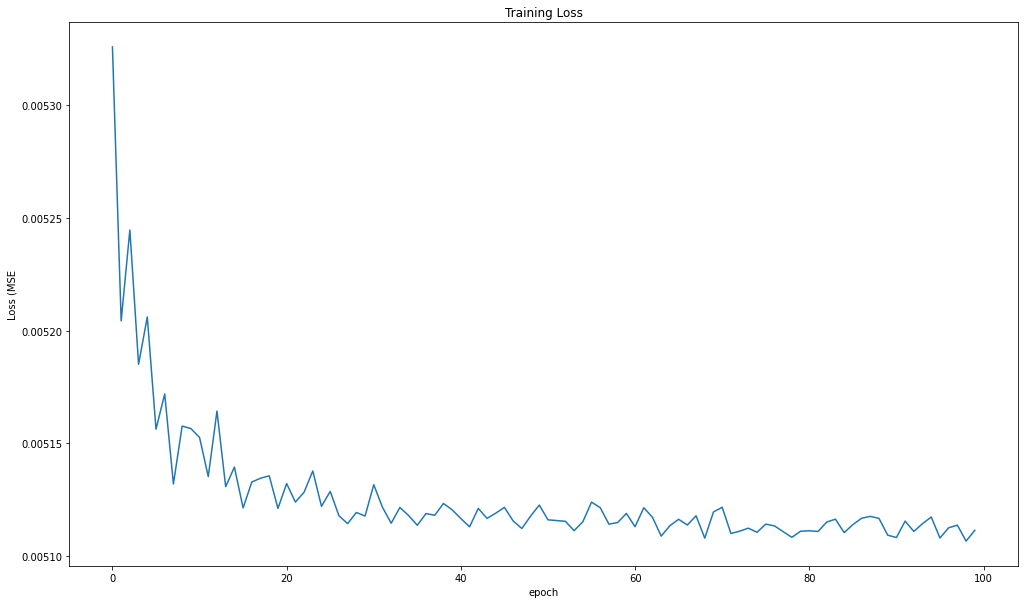

In [17]:
#Tampilkan data loss dalam proses training
len(history01.history['loss'])
gambar(history01.epoch,history01.history['loss'], 'Training Loss', 'epoch', 'Loss (MSE')

In [18]:
# Prediksi total_price dari data training
prediksi01 = model.predict(dfx1)

In [19]:
#Evaluasi model dengan data training
scores = model.evaluate(dfx1, dfy1, verbose=1)
print("Hasil tes evaluasi model : {} %" .format(scores * 100))

156/156 [==============================] - 4s 7ms/step - loss: 0.0051
Hasil tes evaluasi model : 0.5110181868076324 %


In [20]:
#Cek nilai error MAE, MSE dan RMSE
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(dfy1, prediksi01),3)) #MAE
print('Mean Squared Error:', np.round(metrics.mean_squared_error(dfy1, prediksi01),3)) #MSE
print('Root Mean Squared Error:', np.round(metrics.mean_squared_error(dfy1, prediksi01, squared=False),3)) #RMSE

Mean Absolute Error: 0.053
Mean Squared Error: 0.005
Root Mean Squared Error: 0.071
